# Affine transforms using Scipy
In this section we demonstrate how to apply an affine transform using [scipy](https://scipy.org).


In [1]:
from skimage.io import imread, imshow
image = imread('../../data/Haase_MRT_tfl3d1.tif')

(192, 256, 256)

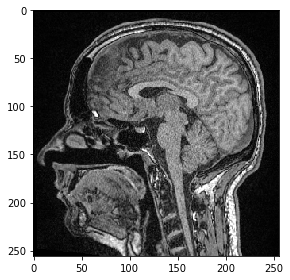

In [3]:
imshow(image[100])
image.shape

In [4]:
import numpy as np

# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
print(output_shape)


(384, 512, 512)


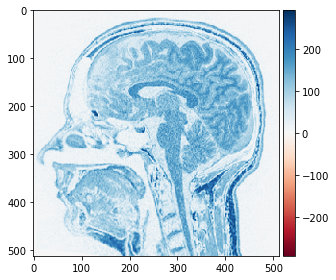

In [5]:
from scipy import ndimage as ndi

scaled = np.ndarray(output_shape)
ndi.affine_transform(image, matrix, output=scaled, output_shape=output_shape)

imshow(scaled[200])